<a href="https://colab.research.google.com/github/Deepsphere-AI/BCA/blob/main/SEM-2/Data%20Science/Programs/02_EDA_On_Bussiness_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# ***********************************************************************************************
  
  # File Name 	:   Program_02_EDA_On_Bussiness_Dataset
  # Purpose 	  :   Exploratory data analysis On Business Dataset - II
  # Author	    :   Deepsphere.ai
  # Reviewer 	  :   Jothi Periasamy
  # Date        :   08/02/2023 
  # Version	    :   1.0	
  
# ***********************************************************************************************

## Program Description : Exploratory data analysis On Business Dataset


# 1.Import Libraries
# 2. Examining numerical and categorical features from the dataframe 
# 3. Checking for NAN  or null vlaues in Numerical columns
# 4. checking whether data follow Normal Distribution or skewed Distribution
# 5. Finding Correlation coefficients (Sales Price feature vs Remaning Features)
# 6. To check and Remove outliers in Numeric Features
 

## Python Development Environment & Runtime - Python, Anaconda

# Exploratory data analysis On Business Dataset.

Exploratory Data Analysis (EDA) is a crucial initial step in the data analysis process where the goal is to understand the underlying structure, patterns, relationships, and anomalies in a dataset. It is a process of visually and statistically investigating a dataset to gain insights, identify trends and relationships, and uncover any potential issues or limitations. EDA typically involves techniques such as:

Descriptive statistics (e.g., mean, median, standard deviation, etc.) to understand the basic structure of the data.
Data visualization (e.g., histograms, scatter plots, box plots, etc.) to visually represent the relationships between variables and to identify outliers or anomalies.
Dimensionality reduction techniques (e.g., PCA, t-SNE, etc.) to reduce the number of variables and visualize complex relationships.
Hypothesis testing to test assumptions about the data and make inferences about the population based on the sample.
EDA is an iterative process, and the results of EDA can inform the selection of appropriate statistical models and algorithms for the subsequent stages of data analysis.
   
## Overview

This is an exploratory data analysis on the House Prices Kaggle Competition found at 

https://www.kaggle.com/c/house-prices-advanced-regression-techniques


The dream home of a potential buyer is likely not defined by the height of the basement ceiling or the location near a railroad. However, the dataset used in this housing competition shows that numerous factors contribute to determining the final price of a home, including the number of bedrooms and fence type. There are 1460 training instances and 1460 test instances, with a total of 81 attributes. 36 are numerical, 43 are categorical, and the rest are identification and sale price. Numerical features include variables such as square footage, number of bathrooms, and the year built. Categorical features include details like the type of heating, exterior finish, and neighborhood.

## 1.Import Libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
import warnings
warnings.filterwarnings("ignore")

To begin working with your data, you will need to load it into your program. Thanks to the Pandas library, this process is straightforward: you can import the library and use the read_csv() function to load the data from the URL, specifying any necessary arguments like the delimiter or column names.

In [24]:
dataframe = pd.read_csv('https://raw.githubusercontent.com/Deepsphere-AI/BCA/main/SEM-2/Data%20Science/Programs/Data/train.csv')

A basic understanding of your data can be obtained by getting a summary of its characteristics. The describe() function in Pandas provides various statistics that exclude missing values.

You can examine the data further by using the head() and tail() functions to view the first and last lines of the DataFrame, respectively.

In [25]:
print("\n\t\t\t\t************************* OutPut ************************\n")
dataframe.describe()


				************************* OutPut ************************



,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [26]:
print("\n******************* OutPut ********************\n")
print(dataframe.shape)
print("\n***********************************************\n")


******************* OutPut ********************

(1460, 81)

***********************************************



### 2. Examining numerical and categorical features from the dataframe 

In [27]:
numeric_features = dataframe.select_dtypes(include=[np.number])
print("\n\t\t******************* OutPut ********************\n")
print(numeric_features.columns)
print("\n\t\t***********************************************\n")


		******************* OutPut ********************

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

		***********************************************



In [28]:
print("\n\t\t******************* OutPut ********************\n")
categorical_features = dataframe.select_dtypes(include=[np.object])
print(categorical_features.columns)
print("\n\t\t************************************************\n")


		******************* OutPut ********************

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

		************************************************



### 3. Checking for NAN  or null vlaues in Numerical columns.

In [29]:
print("\n******************* OutPut ********************\n")
print(dataframe.isna().sum())
print("\n***********************************************\n")


******************* OutPut ********************

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

***********************************************



### 4. checking whether data follow Normal Distribution or skewed Distribution.


******************* OutPut ********************



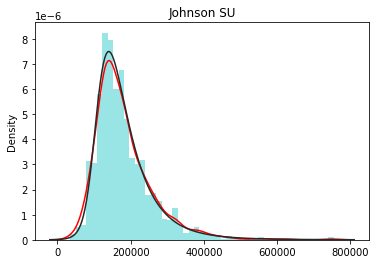

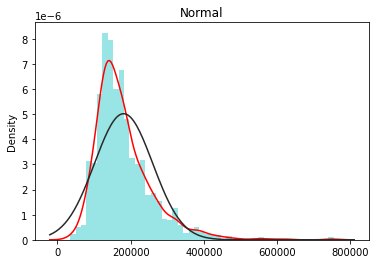

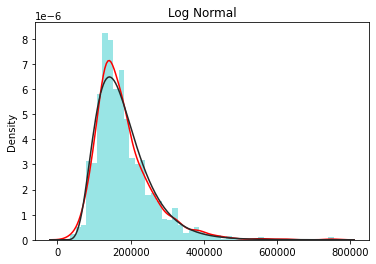

In [30]:
print("\n******************* OutPut ********************\n")

plt.figure(1)
plt.title('Johnson SU')
sns.distplot(x = dataframe['SalePrice'], kde=True,kde_kws={'color':'red'},fit=st.johnsonsu,color='c')
plt.figure(2)
plt.title('Normal')
sns.distplot(x = dataframe['SalePrice'], kde=True,kde_kws={'color':'red'},fit=st.norm,color='c')
plt.figure(3) 
plt.title('Log Normal')
sns.distplot(x = dataframe['SalePrice'], kde=True,kde_kws={'color':'red'},fit=st.lognorm,color='c')

It is apparent that SalePrice doesn't follow normal distribution, so before performing regression it has to be transformed. While log transformation does pretty good job, best fit is unbounded Johnson distribution.


******************* OutPut ********************



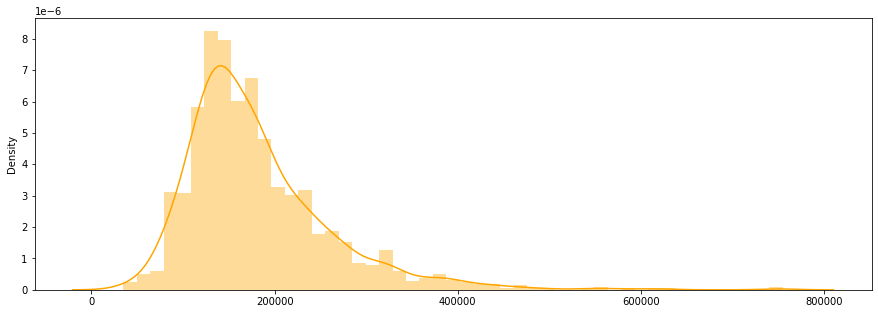

<Figure size 432x288 with 0 Axes>

In [31]:
print("\n******************* OutPut ********************\n")
plt.figure(figsize=(15,5))
sns.distplot(x = dataframe['SalePrice'], color ='orange'); 
plt.show()
plt.tight_layout()

#### After applying log to the sales Price Feature


******************* OutPut ********************



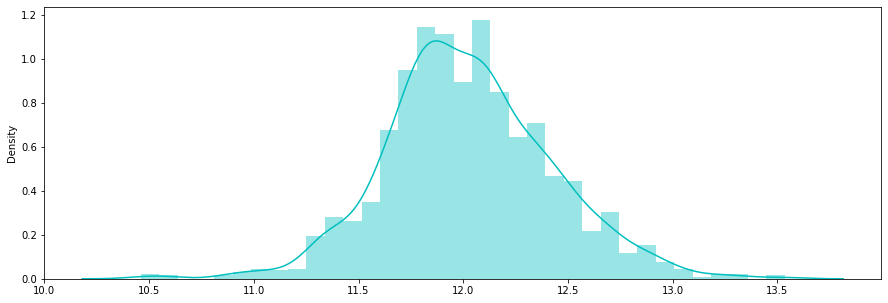

In [32]:
print("\n******************* OutPut ********************\n")
plt.figure(figsize=(15,5))
target = np.log(dataframe['SalePrice'])
sns.distplot(x = target,color='c');

### 5. Finding Correlation coefficients (Sales Price feature vs Remaning Features)

In [33]:
print("\n******************* OutPut ********************\n")
correlation = numeric_features.corr()
print(correlation['SalePrice'].sort_values(ascending = False),'\n')
print("\n***********************************************\n")


******************* OutPut ********************

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch 

#### To explore further we will start with the following visualisation methods to analyze the data better:


 - Zoomed Heat Map



#### Correlation Matrix with Zoomed HeatMap


			******************* OutPut ********************

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

			**********************************************



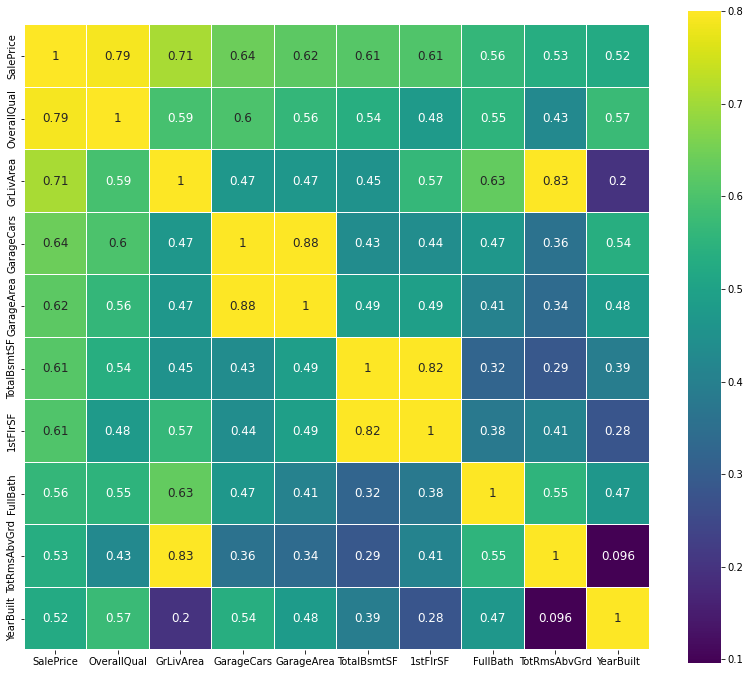

In [34]:
print("\n\t\t\t******************* OutPut ********************\n")
cols = correlation.nlargest(10,'SalePrice')['SalePrice'].index
print(cols)
print("\n\t\t\t**********************************************\n")
confusion_matrix_ = np.corrcoef(dataframe[cols].values.T)
fig , ax = plt.subplots(figsize = (14,12))
sns.heatmap(confusion_matrix_, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values);

From above zoomed heatmap it is observed that GarageCars & GarageArea are closely correlated .
Similarly TotalBsmtSF and 1stFlrSF are also closely correlated.


The main findings from my observations are:

1 The variables 'OverallQual', 'GrLivArea', and 'TotalBsmtSF' have a strong correlation with 'SalePrice'.

2 'GarageCars' and 'GarageArea' are highly correlated and are similar to twin brothers. We can keep 'GarageCars' as it has a higher correlation with 'SalePrice'.

3 'TotalBsmtSF' and '1stFloor' are also like twins, and we will keep 'TotalBsmtSF' in our analysis.

4 'TotRmsAbvGrd' and 'GrLivArea' are also twins.

5 'YearBuilt' appears to have a slightly positive correlation with 'SalePrice', and further analysis, such as time series analysis, may be necessary to confirm this.

The pair plots offer valuable insights into the correlations between the variables. One noticeable relationship is between 'TotalBsmtSF' and 'GrLiveArea', where the majority of the dots form a linear line. Additionally, there is an exponential pattern between 'SalePrice' and 'YearBuilt', with prices increasing faster in recent years.

### 6. To check and Remove outliers in Numeric Features


******************* OutPut ********************



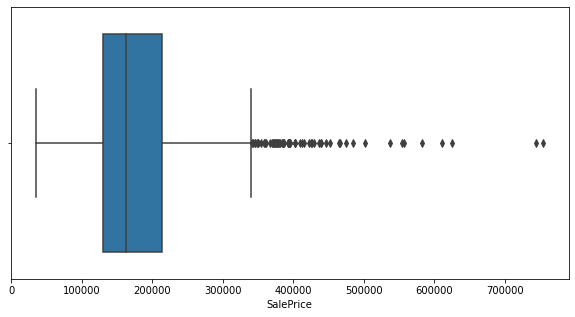

In [35]:
print("\n******************* OutPut ********************\n")
plt.figure(figsize=(10,5))
sns.boxplot(x=dataframe['SalePrice']);

#### To remove Outliers we are finding Quantiles

In [36]:
Q1 = dataframe.quantile(0.25)
Q3 = dataframe.quantile(0.75)
IQR = Q3 - Q1
print("\n******************* OutPut ********************\n")
print(IQR)
print("\n************************************************\n")


******************* OutPut ********************

Id                 729.50
MSSubClass          50.00
LotFrontage         21.00
LotArea           4048.00
OverallQual          2.00
OverallCond          1.00
YearBuilt           46.00
YearRemodAdd        37.00
MasVnrArea         166.00
BsmtFinSF1         712.25
BsmtFinSF2           0.00
BsmtUnfSF          585.00
TotalBsmtSF        502.50
1stFlrSF           509.25
2ndFlrSF           728.00
LowQualFinSF         0.00
GrLivArea          647.25
BsmtFullBath         1.00
BsmtHalfBath         0.00
FullBath             1.00
HalfBath             1.00
BedroomAbvGr         1.00
KitchenAbvGr         0.00
TotRmsAbvGrd         2.00
Fireplaces           1.00
GarageYrBlt         41.00
GarageCars           1.00
GarageArea         241.50
WoodDeckSF         168.00
OpenPorchSF         68.00
EnclosedPorch        0.00
3SsnPorch            0.00
ScreenPorch          0.00
PoolArea             0.00
MiscVal              0.00
MoSold               3.00
YrSold        

In [37]:
dataframe = dataframe[~((dataframe < (Q1 - 1.5 * IQR)) |(dataframe > (Q3 + 1.5 * IQR))).any(axis=1)]
print("\n******************* OutPut ********************\n")
print(dataframe.shape)
print("\n***********************************************\n")


******************* OutPut ********************

(563, 81)

***********************************************



#### Sales Price feature after Removing outliers


******************* OutPut ********************



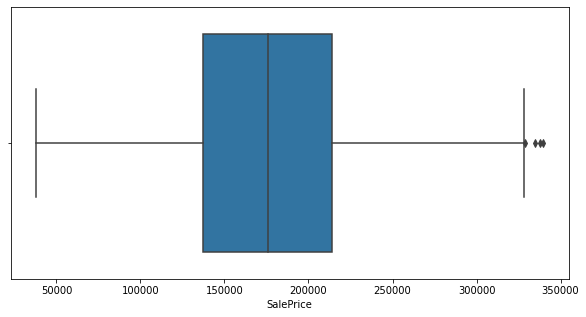

In [38]:
print("\n******************* OutPut ********************\n")
plt.figure(figsize=(10,5))
sns.boxplot(x=dataframe["SalePrice"]);